In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import shap

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv('data/Dataset.csv')
df.sample(5)
# df.tail()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
39,GP,F,R,GT3,T,2,2.0,at_home,other,reputation,mother,1.0,0,yes,yes,no,yes,yes,yes,no,4,3.0,1,1,2,8.0,14,NaN,12,15.0,1.0,1.0,no
391,GP,F,U,GT3,T,3,4.0,services,other,course,mother,1.0,0,no,no,no,no,yes,yes,yes,4,4.0,5,1,5,8.0,11,13.0,14,17.0,3.0,3.0,no
156,GP,F,U,GT3,T,1,1.0,other,services,course,father,1.0,0,no,yes,no,no,yes,yes,yes,4,4.0,2,1,5,0.0,12,12.0,12,15.0,NaN,2.0,no
179,GP,M,U,GT3,T,3,2.0,services,services,course,mother,2.0,3,no,yes,no,yes,no,no,no,4,5.0,2,1,2,10.0,8,7.0,8,17.0,1.0,1.0,no
288,GP,F,U,LE3,A,2,1.0,other,other,course,mother,NaN,0,no,yes,no,no,no,yes,yes,4,3.0,4,1,5,2.0,12,12.0,13,18.0,2.0,3.0,yes


In [3]:
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)
df.sample(5)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
69,GP,F,R,LE3,T,3,NaN,other,other,reputation,father,2.0,0,0,1,0,0,0,1,1,4,4.0,2,2,3,6.0,15,15.0,15,15.0,NaN,3.0,0
140,GP,M,R,GT3,T,3,4.0,at_home,other,course,mother,3.0,0,0,0,0,0,1,1,0,5,4.0,5,2,5,2.0,10,NaN,10,17.0,2.0,4.0,0
204,GP,F,U,GT3,T,2,NaN,services,services,course,mother,1.0,0,0,0,0,0,1,NaN,1,4,3.0,3,1,2,6.0,12,12.0,13,16.0,2.0,1.0,0
238,GP,F,U,GT3,T,4,4.0,teacher,services,home,mother,1.0,0,0,1,0,1,0,1,1,5,3.0,2,1,5,4.0,15,16.0,16,16.0,NaN,1.0,0
515,MS,F,U,LE3,T,1,1.0,other,at_home,reputation,mother,2.0,0,1,0,0,0,1,1,0,2,3.0,5,1,3,8.0,9,8.0,10,18.0,2.0,4.0,0


In [4]:
fdf = df[(df['sex']=='F') & (df['romantic']==1)]
fdf.shape[0]

158

In [5]:
mdf = df[(df['sex']=='M') & (df['romantic']==1)]
mdf.shape[0]

81

A strange thing to observe that no. of females engaged in some romantic relationship is about twice that of males.
Completely out of curiosity i was checking and found this.

# Level 1: Variable Identification Protocol

### Feature_1

In [6]:
min_feature_1 = df['Feature_1'].min()
print(f"Minimum value of Feature_1: {min_feature_1}")

Minimum value of Feature_1: 15.0


In [7]:
max_feature_1 = df['Feature_1'].max()
print(f"Maximum value of Feature_1: {max_feature_1}")

Maximum value of Feature_1: 22.0


##### First of all, clearly one can guess this is age because of the minmax values. Also age is one of the primary features of a person.

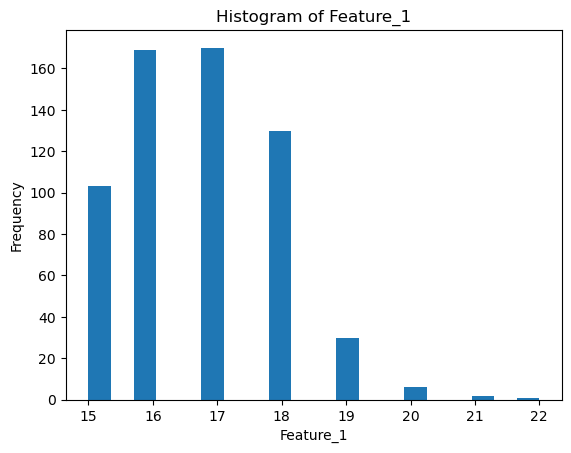

In [8]:
plt.hist(df['Feature_1'].dropna(), bins=20)
plt.xlabel('Feature_1')
plt.ylabel('Frequency')
plt.title('Histogram of Feature_1')
plt.show()

##### looking at the histogram, it shows that most of the students have this feature as 16-18 which is the proper age.

In [9]:
correlations = df.corr(numeric_only=True)['Feature_1'].drop('Feature_1')
closest_col = correlations.abs().idxmax()
print(f"Column with closest correlation to Feature_1: {closest_col}")
print(f"Correlation value: {correlations[closest_col]}")

Column with closest correlation to Feature_1: failures
Correlation value: 0.3121506808864298


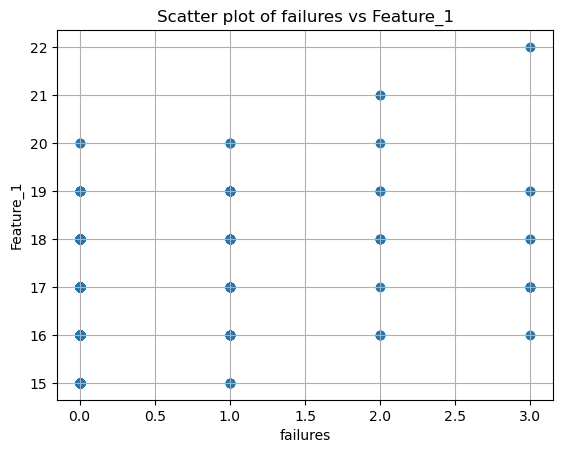

In [10]:
X = df[closest_col]
Y = df['Feature_1']
plt.scatter(X, Y)
plt.xlabel(closest_col)
plt.ylabel('Feature_1')
plt.title(f'Scatter plot of {closest_col} vs Feature_1')
plt.grid()
plt.show()

##### Closest correlation we got was failure. It supports our statement because more the no. of failures the later you join college and so goes the age.

In [11]:
correlations_2 = df.corr(numeric_only=True)['Feature_1'].drop('Feature_1').drop(closest_col)
closest_col_2 = correlations_2.abs().idxmax()
print(f"Column with second closest correlation to Feature_1: {closest_col_2}")
print(f"Correlation value: {correlations_2[closest_col_2]}")

Column with second closest correlation to Feature_1: G1
Correlation value: -0.18157129355471818


##### the second closest correlation is the will to do higher studies and the direction is negative representing that lesser the higher the chance of pursuing higher studies

### Feature_2

In [12]:
min_feature_2 = df['Feature_2'].min()
print(f"Minimum value of Feature_2: {min_feature_2}")

Minimum value of Feature_2: 1.0


In [13]:
max_feature_2 = df['Feature_2'].max()
print(f"Maximum value of Feature_2: {max_feature_2}")

Maximum value of Feature_2: 4.0


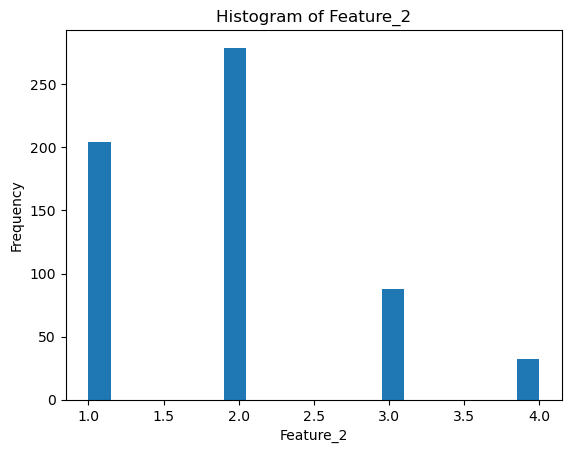

In [14]:
plt.hist(df['Feature_2'].dropna(), bins=20)
plt.xlabel('Feature_2')
plt.ylabel('Frequency')
plt.title('Histogram of Feature_2')
plt.show()

##### The values of Feature_2 range from 1 to 4 which could possibly mean that this is rated on level of something

In [15]:
correlations_2_1 = df.corr(numeric_only=True)['Feature_2'].drop('Feature_2')
closest_col_2_1 = correlations_2_1.abs().idxmax()
print(f"Column with closest correlation to Feature_2: {closest_col_2_1}")
print(f"Correlation value: {correlations_2_1[closest_col_2_1]}")

Column with closest correlation to Feature_2: G1
Correlation value: 0.2614772861816938


In [16]:
correlations_2_2 = df.corr(numeric_only=True)['Feature_2'].drop('Feature_2').drop(closest_col_2_1)
closest_col_2_2 = correlations_2_2.abs().idxmax()
print(f"Column with second closest correlation to Feature_2: {closest_col_2_2}")
print(f"Correlation value: {correlations_2_2[closest_col_2_2]}")

Column with second closest correlation to Feature_2: G3
Correlation value: 0.249883825217531


In [17]:
correlations_2_3 = df.corr(numeric_only=True)['Feature_2'].drop('Feature_2').drop(closest_col_2_1).drop(closest_col_2_2)
closest_col_2_3 = correlations_2_3.abs().idxmax()
print(f"Column with third closest correlation to Feature_2: {closest_col_2_3}")
print(f"Correlation value: {correlations_2_3[closest_col_2_3]}")

Column with third closest correlation to Feature_2: G2
Correlation value: 0.24554662000678812


In [18]:
correlations_2_4 = df.corr(numeric_only=True)['Feature_2'].drop('Feature_2').drop(closest_col_2_1).drop(closest_col_2_2).drop(closest_col_2_3)
closest_col_2_4 = correlations_2_4.abs().idxmax()
print(f"Column with fourth closest correlation to Feature_2: {closest_col_2_4}")
print(f"Correlation value: {correlations_2_4[closest_col_2_4]}")

Column with fourth closest correlation to Feature_2: Feature_3
Correlation value: -0.19916161003582447


##### As we see, Feature_2 correlates with G1, G2, G3 and then with higher studies all in positive magnitude. Hence it could be said that it is related to study

### Feature_3

In [19]:
min_feature_3 = df['Feature_3'].min()
print(f"Minimum value of Feature_3: {min_feature_3}")

Minimum value of Feature_3: 1.0


In [20]:
max_feature_3 = df['Feature_3'].max()
print(f"Maximum value of Feature_3: {max_feature_3}")

Maximum value of Feature_3: 5.0


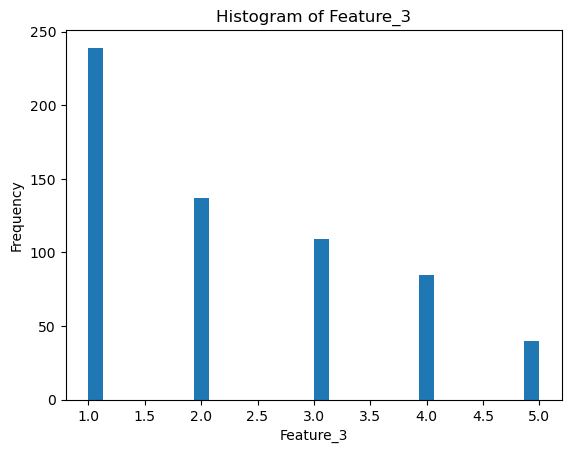

In [21]:
plt.hist(df['Feature_3'].dropna(), bins=30)
plt.xlabel('Feature_3')
plt.ylabel('Frequency')
plt.title('Histogram of Feature_3')
plt.show()

##### same again it looks like some rating of something. Let's look at the correlations now.

In [22]:
correlations_3_1 = df.corr(numeric_only=True)['Feature_3'].drop('Feature_3')
closest_col_3_1 = correlations_3_1.abs().idxmax()
print(f"Column with closest correlation to Feature_3: {closest_col_3_1}")
print(f"Correlation value: {correlations_3_1[closest_col_3_1]}")

Column with closest correlation to Feature_3: Dalc
Correlation value: 0.6243731502243397


In [23]:
correlations_3_2 = df.corr(numeric_only=True)['Feature_3'].drop('Feature_3').drop(closest_col_3_1)
closest_col_3_2 = correlations_3_2.abs().idxmax()
print(f"Column with closest correlation to Feature_3: {closest_col_3_2}")
print(f"Correlation value: {correlations_3_2[closest_col_3_2]}")

Column with closest correlation to Feature_3: goout
Correlation value: 0.3978106514150925


In [24]:
correlations_3_3 = df.corr(numeric_only=True)['Feature_3'].drop('Feature_3').drop(closest_col_3_1).drop(closest_col_3_2)
closest_col_3_3 = correlations_3_3.abs().idxmax()
print(f"Column with closest correlation to Feature_3: {closest_col_3_3}")
print(f"Correlation value: {correlations_3_3[closest_col_3_3]}")

Column with closest correlation to Feature_3: Feature_2
Correlation value: -0.19916161003582447


In [25]:
correlations_3_4 = df.corr(numeric_only=True)['Feature_3'].drop('Feature_3').drop(closest_col_3_1).drop(closest_col_3_2).drop(closest_col_3_3)
closest_col_3_4 = correlations_3_4.abs().idxmax()
print(f"Column with closest correlation to Feature_3: {closest_col_3_4}")
print(f"Correlation value: {correlations_3_4[closest_col_3_4]}")

Column with closest correlation to Feature_3: G3
Correlation value: -0.17572619304096446


In [26]:
df['romantic'] = df['romantic'].astype('int')
print(df['romantic'].dtype)

int64


##### As seen above, Feature_3 has correlation with alcohol consumption and going out in positive and that with study hours and grades in negative. This means Feature_3 likely represents ones level of extrovertedness

In [27]:
df.rename(columns={'Feature_1': 'age', 'Feature_2': 'studytime', 'Feature_3': 'extrovert'}, inplace=True)

# Level 2

##### Let's go through all the columns with null objects and apply suitable values to them.

In [28]:
df.count()

school        649
sex           649
address       649
famsize       599
Pstatus       649
Medu          649
Fedu          576
Mjob          649
Fjob          649
reason        649
guardian      649
traveltime    576
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
nursery       649
higher        573
internet      649
famrel        649
freetime      604
goout         649
Dalc          649
health        649
absences      580
G1            649
G2            614
G3            649
age           611
studytime     603
extrovert     610
romantic      649
dtype: int64

In [29]:
null_columns = df.columns[df.isnull().any()]
df_nulls = df[null_columns]
df_nulls.sample(5)

,famsize,Fedu,traveltime,higher,freetime,absences,G2,age,studytime,extrovert
337,GT3,3.0,1.0,1,2.0,0.0,18.0,17.0,3.0,2.0
202,GT3,3.0,1.0,1,NaN,10.0,13.0,17.0,2.0,3.0
506,GT3,3.0,2.0,1,3.0,8.0,9.0,20.0,2.0,4.0
270,GT3,4.0,1.0,NaN,3.0,4.0,15.0,16.0,1.0,2.0
616,LE3,1.0,2.0,1,3.0,2.0,13.0,18.0,1.0,2.0


In [30]:
null_columns = df.columns[df.isnull().any()]
columns_with_nulls = list(null_columns)
print(columns_with_nulls)

['famsize', 'Fedu', 'traveltime', 'higher', 'freetime', 'absences', 'G2', 'age', 'studytime', 'extrovert']


### famsize

For family size let's drop the rows because it's rather not precise to guess the size to be greater than or less than equal to 3.

In [31]:
df[df['famsize'].isna()].sample(5)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
312,GP,F,U,NaN,T,2,3.0,other,services,reputation,father,1.0,0,0,1,0,1,1,1,1,4,5.0,5,1,2,10.0,16,16.0,16,NaN,4.0,3.0,1
397,GP,F,U,NaN,A,2,2.0,at_home,at_home,home,father,1.0,0,0,1,0,0,1,1,1,3,3.0,1,1,4,18.0,10,12.0,14,17.0,2.0,2.0,1
609,MS,F,U,NaN,T,1,2.0,at_home,at_home,course,father,2.0,0,0,1,0,0,1,NaN,0,4,1.0,1,1,4,0.0,11,11.0,12,18.0,2.0,1.0,0
441,MS,M,U,NaN,T,1,1.0,other,other,home,mother,1.0,0,0,0,1,0,0,1,1,4,4.0,3,2,5,4.0,8,9.0,9,17.0,2.0,4.0,0
251,GP,F,U,NaN,T,2,1.0,other,other,home,mother,1.0,0,0,0,0,0,1,1,1,4,5.0,2,1,5,4.0,9,10.0,10,16.0,1.0,1.0,1


In [32]:
df.dropna(subset=['famsize'], inplace=True)

### Fedu

Fedu value being null probably represents that there wasn't accurate information on it. Hence let's just do the median as the value to be assigned to null.

In [33]:
df[df['Fedu'].isna()].sample(5)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
182,GP,F,U,GT3,T,2,NaN,other,other,home,mother,1.0,0,0,1,0,0,0,1,1,5,1.0,5,1,4,0.0,12,12.0,13,16.0,2.0,1.0,0
582,MS,F,U,LE3,A,1,NaN,at_home,other,course,mother,1.0,0,0,1,0,0,1,NaN,0,1,4.0,4,1,5,0.0,6,8.0,7,19.0,1.0,1.0,0
306,GP,M,R,LE3,A,3,NaN,other,other,reputation,mother,2.0,0,0,1,0,1,1,NaN,1,4,2.0,5,3,1,6.0,15,16.0,16,18.0,2.0,4.0,0
190,GP,F,U,GT3,T,2,NaN,services,other,reputation,mother,2.0,0,0,0,0,1,0,1,1,3,4.0,4,1,5,0.0,13,12.0,14,16.0,2.0,4.0,0
280,GP,M,R,LE3,T,3,NaN,other,services,course,mother,1.0,0,0,1,0,0,1,1,1,4,3.0,3,1,5,8.0,10,9.0,10,18.0,2.0,3.0,1


In [34]:
median_Fedu = df['Fedu'].median()
df.fillna({'Fedu': median_Fedu}, inplace=True)

### traveltime, higher, freetime, absences

traveltime being zero represents that the student lived very close to the school.

higher studies as NaN also represents no will to study higher.

freetime ans null also represents there wasn't enough free time.

100% attendance corresponds to null failures.

In [35]:
df[df['traveltime'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
127,GP,F,U,GT3,T,0,1.0,at_home,other,course,other,NaN,2,0,1,0,0,0,0,0,3,4.0,2,1,5,0.0,9,10.0,11,19.0,2.0,1.0,0


In [36]:
df[df['higher'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
204,GP,F,U,GT3,T,2,2.0,services,services,course,mother,1.0,0,0,0,0,0,1,NaN,1,4,3.0,3,1,2,6.0,12,12.0,13,16.0,2.0,1.0,0


In [37]:
df[df['freetime'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
395,GP,M,U,GT3,T,4,4.0,teacher,services,home,father,1.0,0,0,1,0,1,1,1,1,4,NaN,3,2,2,0.0,12,12.0,13,18.0,2.0,2.0,0


In [38]:
df[df['absences'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
62,GP,F,U,LE3,T,1,2.0,other,services,reputation,father,1.0,0,1,0,0,1,1,1,1,4,4.0,3,1,1,NaN,13,13.0,10,16.0,2.0,1.0,0


In [39]:
df.fillna({'traveltime': 0, 'higher': 0, 'freetime': 0, 'absences': 0}, inplace=True)

### G2, age, studytime, extrovert

all these null values can be replaced with their respective medians.

In [40]:
df[df['G2'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
508,MS,M,R,GT3,T,2,2.0,other,other,course,mother,0.0,1,0,1,0,0,0,1,1,4,4.0,5,1,5,0.0,10,NaN,9,17.0,1.0,NaN,0


In [41]:
df[df['age'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
5,GP,M,U,LE3,T,4,3.0,services,other,reputation,mother,1.0,0,0,1,0,1,1,1,1,5,4.0,2,1,5,6.0,12,12.0,13,NaN,2.0,2.0,0


In [42]:
df[df['studytime'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
163,GP,M,U,LE3,T,1,1.0,other,other,course,mother,1.0,2,0,0,0,0,1,0,1,2,3.0,5,2,4,0.0,11,9.0,0,NaN,NaN,5.0,1


In [43]:
df[df['extrovert'].isna()].sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
580,MS,M,R,GT3,T,1,1.0,other,other,home,other,3.0,1,0,1,0,0,1,1,1,4,4.0,4,3,5,4.0,8,9.0,10,19.0,1.0,NaN,0


In [44]:
median_G2 = df['G2'].median()
df.fillna({'G2': median_G2}, inplace=True)
median_age = df['age'].median()
df.fillna({'age': median_age}, inplace=True)
median_studytime = df['studytime'].median()
df.fillna({'studytime': median_studytime}, inplace=True)
median_extrovert = df['extrovert'].median()
df.fillna({'extrovert': median_extrovert}, inplace=True)

# Level 3

### Q1. Do students in romantic relationships show different absence periods?

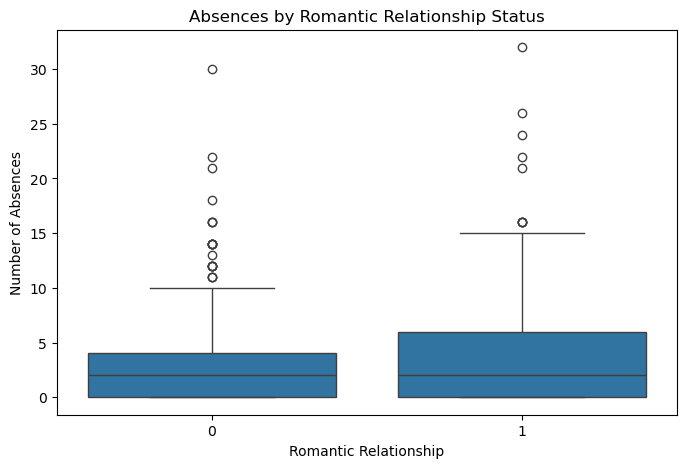

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='romantic', y='absences', data=df)
plt.title('Absences by Romantic Relationship Status')
plt.xlabel('Romantic Relationship')
plt.ylabel('Number of Absences')
plt.show()

##### People in romantic relationship have higher absences than those who aren't.

### Q2. How do family relationship quality influence romantic involvement?

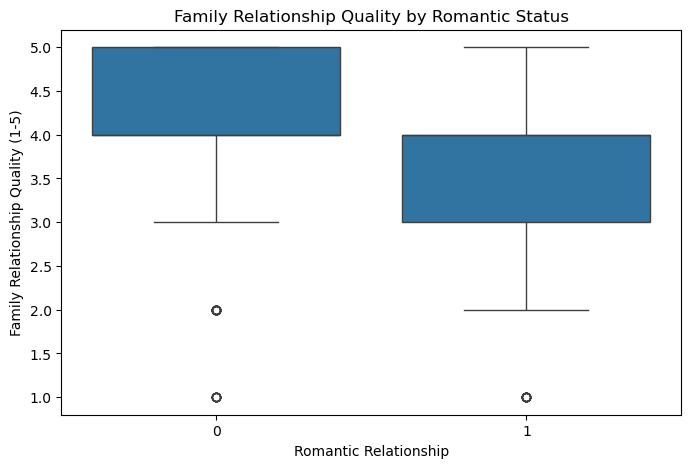

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='romantic', y='famrel', data=df)
plt.title('Family Relationship Quality by Romantic Status')
plt.xlabel('Romantic Relationship')
plt.ylabel('Family Relationship Quality (1-5)')
plt.show()

##### clearly, People in romantic relationship have poor family relationship quality.

### Q3. Does Mother's education affect the chance of paid classes?

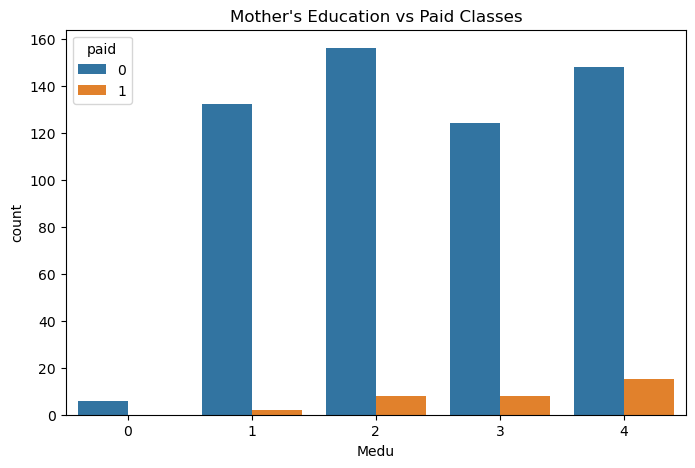

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Medu', hue='paid', data=df)
plt.title("Mother's Education vs Paid Classes")
plt.show()

##### As seen, the count of paid classes attended increases with mother's education.

### Q4. Which address students have higher weekly alcohol consumption?

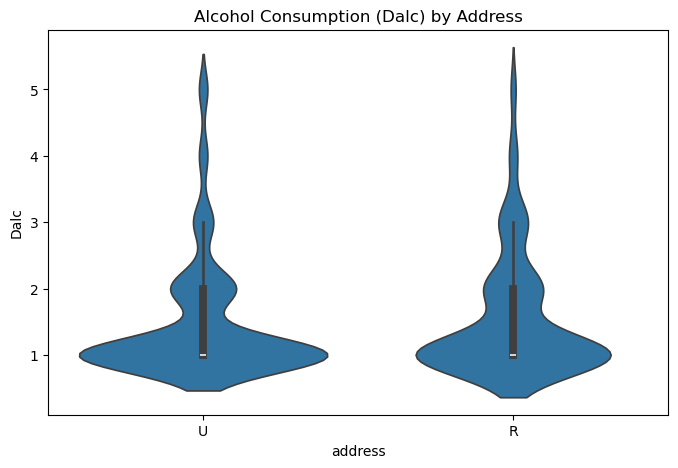

In [48]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='address', y='Dalc', data=df)
plt.title('Alcohol Consumption (Dalc) by Address')
plt. show()

##### The width of 1 rated alcohol consumption (little to no consumption) is more in urban than that in rural address.

### Q5. How does traveltime affect grades?

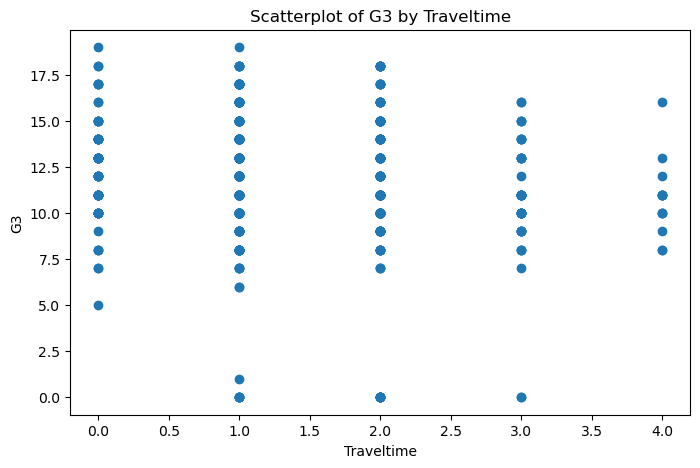

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter(df['traveltime'], df['G3'])
plt.xlabel('Traveltime')
plt.ylabel('G3')
plt.title('Scatterplot of G3 by Traveltime')
plt.show()

##### The grades fall slightly with increased travel time.

# Level 4

### Preprocessing

In [50]:
new_df = df.copy()
new_df['school'] = new_df['school'].replace({'GP': 1, 'MS': 0})
new_df['sex'] = new_df['sex'].replace({'M': 1, 'F': 0})
new_df['address'] = new_df['address'].replace({'U': 1, 'R': 0})
new_df['famsize'] = new_df['famsize'].replace({'GT3': 1, 'LE3': 0})
new_df['Pstatus'] = new_df['Pstatus'].replace({'T': 1, 'A': 0})
new_df = new_df.rename(columns={'school': 'school.GP', 'sex': 'sex.M', 'address': 'address.U', 'famsize': 'famsize.GT3', 'Pstatus': 'Pstatus.T'})
# new_df = new_df.drop(columns=['sex'])
new_df.sample(5)

,school.GP,sex.M,address.U,famsize.GT3,Pstatus.T,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
338,1,0,0,0,1,3,1.0,services,other,reputation,mother,0.0,0,0,1,0,0,1,1,0,3,1.0,2,1,3,0.0,18,19.0,19,17.0,4.0,1.0,0
521,0,0,0,1,1,2,3.0,at_home,services,other,mother,2.0,0,0,1,0,1,1,1,1,3,3.0,3,1,2,0.0,8,10.0,10,16.0,2.0,1.0,0
538,0,0,0,0,1,2,2.0,other,other,course,mother,0.0,0,0,1,0,0,0,1,0,4,3.0,3,2,5,2.0,11,11.0,11,16.0,3.0,2.0,1
214,1,0,1,1,1,4,3.0,health,other,home,mother,1.0,0,0,1,0,1,1,1,1,4,3.0,5,1,2,0.0,14,14.0,15,16.0,2.0,5.0,0
572,0,0,1,1,0,3,2.0,services,at_home,course,mother,2.0,2,0,1,0,1,1,1,0,2,5.0,5,1,1,8.0,5,5.0,7,16.0,2.0,1.0,1


In [51]:
le = LabelEncoder()
new_df['Mjob'] = le.fit_transform(new_df['Medu'])
new_df['Fjob'] = le.fit_transform(new_df['Fjob'])
new_df['reason'] = le.fit_transform(new_df['reason'])
new_df['guardian'] = le.fit_transform(new_df['guardian'])
new_df.sample(5)

,school.GP,sex.M,address.U,famsize.GT3,Pstatus.T,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert,romantic
553,0,1,1,0,0,1,0.0,1,2,1,1,1.0,0,0,0,0,0,1,1,0,4,1.0,2,1,5,4.0,11,11.0,12,17.0,1.0,1.0,1
368,1,1,1,0,1,4,4.0,4,2,3,0,1.0,0,0,1,0,0,1,1,1,4,2.0,5,3,5,2.0,8,9.0,11,17.0,1.0,4.0,0
547,0,1,0,0,1,4,2.0,4,0,2,0,1.0,0,0,0,0,0,1,1,1,4,1.0,2,2,2,0.0,10,11.0,11,16.0,1.0,1.0,0
156,1,0,1,1,1,1,1.0,1,3,0,0,1.0,0,0,1,0,0,1,1,1,4,4.0,2,1,5,0.0,12,12.0,12,15.0,2.0,2.0,0
505,0,0,0,1,1,1,1.0,1,2,3,1,2.0,0,0,1,0,1,0,0,1,4,4.0,5,1,5,0.0,11,12.0,11,17.0,1.0,2.0,1


In [52]:
X = new_df.drop(columns = ['romantic'])
Y = new_df['romantic']
Y = le.fit_transform(Y)
X

,school.GP,sex.M,address.U,famsize.GT3,Pstatus.T,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,age,studytime,extrovert
0,1,0,1,1,0,4,4.0,4,4,0,1,2.0,0,1,0,0,0,1,1,0,4,3.0,4,1,3,4.0,0,11.0,11,18.0,2.0,1.0
1,1,0,1,1,1,1,1.0,1,2,0,0,0.0,0,0,1,0,0,0,1,1,5,3.0,3,1,3,2.0,9,11.0,11,17.0,2.0,1.0
2,1,0,1,0,1,1,1.0,1,2,2,1,1.0,0,1,0,0,0,1,1,1,4,3.0,2,2,3,6.0,12,13.0,12,15.0,2.0,3.0
3,1,0,1,1,1,4,2.0,4,3,1,1,1.0,0,0,1,0,1,1,1,1,3,2.0,2,1,5,0.0,14,14.0,14,15.0,3.0,1.0
4,1,0,1,1,1,3,3.0,3,2,1,0,1.0,0,0,1,0,0,1,1,0,4,3.0,2,1,5,0.0,11,13.0,13,16.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,1,1,2,3.0,2,2,0,1,1.0,1,0,0,0,1,0,1,1,5,4.0,2,1,5,4.0,10,11.0,10,19.0,3.0,2.0
645,0,0,1,0,1,3,1.0,3,3,0,1,1.0,0,0,1,0,0,1,0,1,4,0.0,4,1,1,0.0,15,15.0,16,18.0,2.0,1.0
646,0,0,1,1,1,1,1.0,1,2,0,1,2.0,0,0,0,0,1,1,1,0,1,1.0,1,1,5,6.0,11,12.0,9,18.0,2.0,1.0
647,0,1,1,0,1,3,1.0,3,3,0,1,2.0,0,0,0,0,0,0,1,1,2,4.0,5,3,2,6.0,10,10.0,10,17.0,1.0,4.0


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.23, random_state = 42)

#### Let's use models now.

### 1. Logistic regression

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/home/ritesh/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
logreg_Y_pred = logreg.predict(X_test)
logreg_Y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0])

In [56]:
logreg_score = logreg.score(X_test, Y_test)
logreg_score

0.6231884057971014

#### As we see, Logistic Regression has a success score of 0.62.

### 2. Random Forest

In [57]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [58]:
clf_Y_pred = clf.predict(X_test)
clf_Y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

In [59]:
clf_score = clf.score(X_test, Y_test)
clf_score

0.6086956521739131

#### Similarily, Random Forest has a score of 0.60.

#### After trying various combinations for the classifiers, below is the one (logistic regression) with a prediction score of 0.67

In [60]:
correlations_01 = df.corr(numeric_only=True)['romantic'].drop('romantic').drop('age').drop('G2').drop('G3').drop('absences').drop('G1').drop('Dalc')
closest_col_01 = correlations_01.abs().idxmax()
print(f"Column with closest correlation to romantic: {closest_col_01}")
print(f"Correlation value: {correlations_01[closest_col_01]}")

Column with closest correlation to romantic: failures
Correlation value: 0.0756506705373727


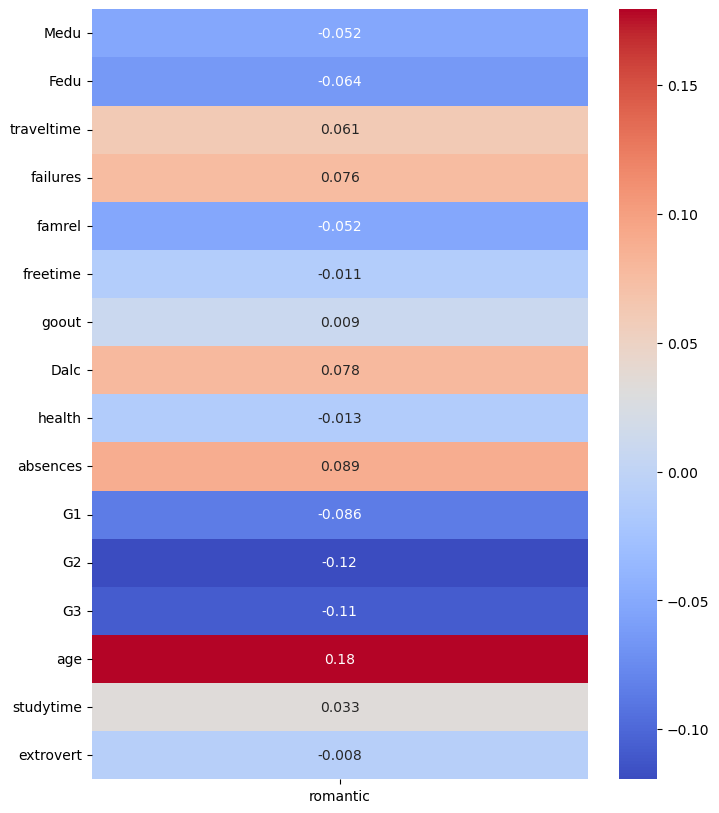

In [61]:
romantic_corr = df.corr(numeric_only=True)['romantic'].drop('romantic')

plt.figure(figsize=(8, 10))
sns.heatmap(romantic_corr.to_frame(), annot=True, cmap='coolwarm')
plt.show()

In [62]:
X2 = new_df[['age', 'G1', 'G2', 'G3', 'absences', 'Dalc']]
X2

,age,G1,G2,G3,absences,Dalc
0,18.0,0,11.0,11,4.0,1
1,17.0,9,11.0,11,2.0,1
2,15.0,12,13.0,12,6.0,2
3,15.0,14,14.0,14,0.0,1
4,16.0,11,13.0,13,0.0,1
...,...,...,...,...,...,...
644,19.0,10,11.0,10,4.0,1
645,18.0,15,15.0,16,0.0,1
646,18.0,11,12.0,9,6.0,1
647,17.0,10,10.0,10,6.0,3


In [63]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y, test_size = 0.23, random_state = 42)

In [64]:
X_test2

,age,G1,G2,G3,absences,Dalc
117,16.0,14,14.0,15,6.0,1
453,16.0,10,8.0,8,0.0,1
613,18.0,10,10.0,10,0.0,1
82,15.0,12,11.0,11,0.0,1
191,17.0,11,9.0,10,0.0,1
...,...,...,...,...,...,...
161,16.0,9,9.0,8,16.0,2
490,18.0,9,11.0,10,4.0,1
210,17.0,13,13.0,14,4.0,1
80,15.0,11,11.0,12,0.0,1


In [65]:
logreg2 = LogisticRegression()
logreg2.fit(X_train2, Y_train2)

LogisticRegression()

In [66]:
logreg_Y_pred2 = logreg2.predict(X_test2)
logreg_Y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [67]:
logreg_score2 = logreg2.score(X_test2, Y_test2)
logreg_score2

0.6739130434782609

In [68]:
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train2, Y_train2)

RandomForestClassifier(random_state=42)

In [69]:
clf_score2 = clf2.score(X_test2, Y_test2)
clf_score2

0.5942028985507246

# Level 5

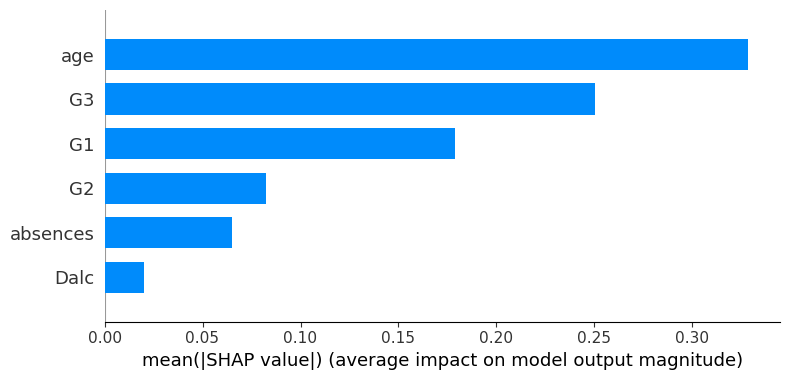

In [70]:
# Use explainer suitable for logistic regression
explainer = shap.Explainer(logreg2, X_train2)
shap_values = explainer(X_test2)

# Summary plot
shap.summary_plot(shap_values, X_test2, plot_type="bar")

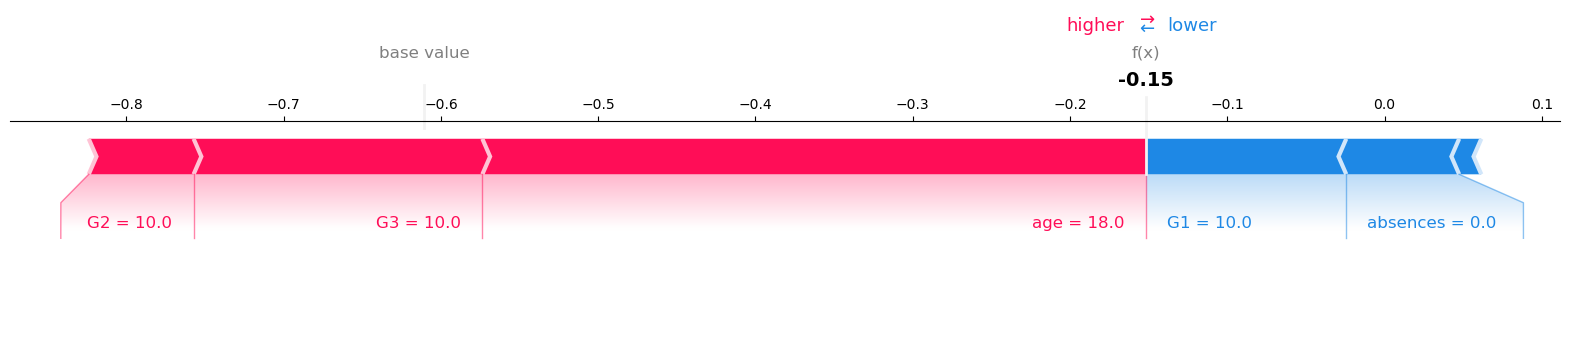

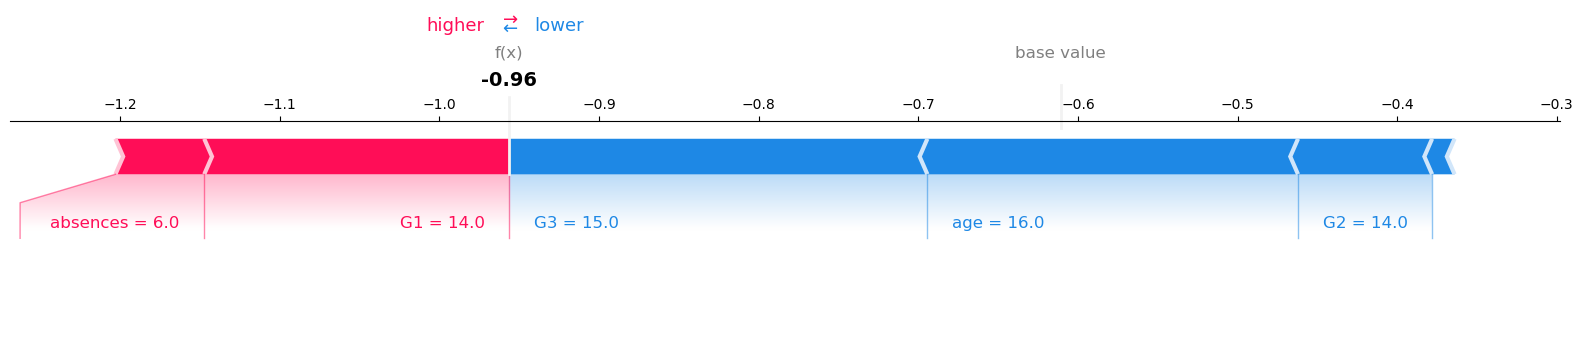

In [71]:
shap.force_plot( shap_values.base_values[2], shap_values.values[2], X_test2.iloc[2], matplotlib=True)
shap.force_plot( shap_values.base_values[0], shap_values.values[0], X_test2.iloc[0], matplotlib=True)